# Install the required Packages

In [63]:
# !pip install xgboost
# !pip install shap
# !pip install optuna
# !pip install catboost
# !conda install -c conda-forge lightgbm


## Load all required Packages

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
import shap
import optuna
from optuna import Trial
from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score


In [65]:
# delimiter is required here as the csv file format is not in the table format.
data = pd.read_csv("student_data.csv", delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Analysis

In [66]:
data.shape

(4424, 35)

In [67]:
data.describe()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   evening attendance                              4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [70]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
evening attendance                                0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [71]:
data['Output'].value_counts()

Output
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

## DATA Plotting

#### ChatGpt Explaination of below code

This code uses the matplotlib.pyplot library to create a pie chart based on the values in the 'Output' column of a DataFrame (df). Let me break down the code for you:


import matplotlib.pyplot as plt
import numpy as np

plt.pie: This function is from the matplotlib.pyplot library and is used to create a pie chart.

df['Output'].value_counts().values: This part of the code calculates the counts of unique values in the 'Output' column of the DataFrame (df). The result is an array of counts.

np.unique(df['Output']): This uses the NumPy library to get the unique values in the 'Output' column.

autopct='%1.1f%%': This specifies the format for displaying the percentage values on each pie wedge. It formats the percentages with one decimal place.

startangle=90: This sets the starting angle of the pie chart to 90 degrees, which means the first wedge will be drawn from the vertical axis.

Putting it all together:

The pie chart is created using the counts of unique values in the 'Output' column of the DataFrame. Each unique value corresponds to a category in the pie chart. The size of each slice is determined by the count of occurrences of that value. Labels are set to the unique values, and percentages are displayed on each wedge with one decimal place. The chart starts drawing slices from the 90-degree angle.

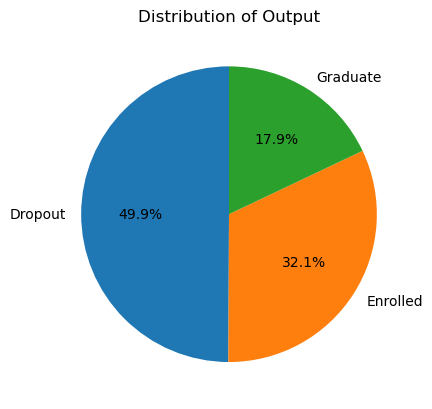

In [72]:
# Look at target variable
plt.pie(data['Output'].value_counts().values, labels=np.unique(data['Output']), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Output')
plt.show()
# if trying to predict dropouts, the distribution is balanced so technically no need to stratify

In [73]:
# Based on description of dataset, can define the list of categorical variables (include binaries)
categorical_variables = ['Marital status', 'Course', 'Nacionality', "Father's occupation",
                         'Application mode', "Mother's occupation", 'Educational special needs',
                         'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
                         'International', 'Displaced', 'evening attendance'
                        ]

# Get remaining numeric variables but remove target
numeric_variables = [col for col in data.columns if col not in categorical_variables]
numeric_variables.remove('Output')

variables = numeric_variables + categorical_variables

def plot_distributions(data, columns, target_variable):

    # Determine the number of subplots required
    num_columns = len(variables)
    num_subplots = math.ceil(num_columns / 2)

    # Create subplots
    fig, axes = plt.subplots(num_subplots, 2, figsize=(12, 4 * num_subplots))
    axes = axes.flatten()

    # Plot distribution plots for each numeric column
    for i in range(num_columns):
        sns.histplot(data=data, x=columns[i], hue=target_variable, stat='percent', common_norm=False, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {columns[i]}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

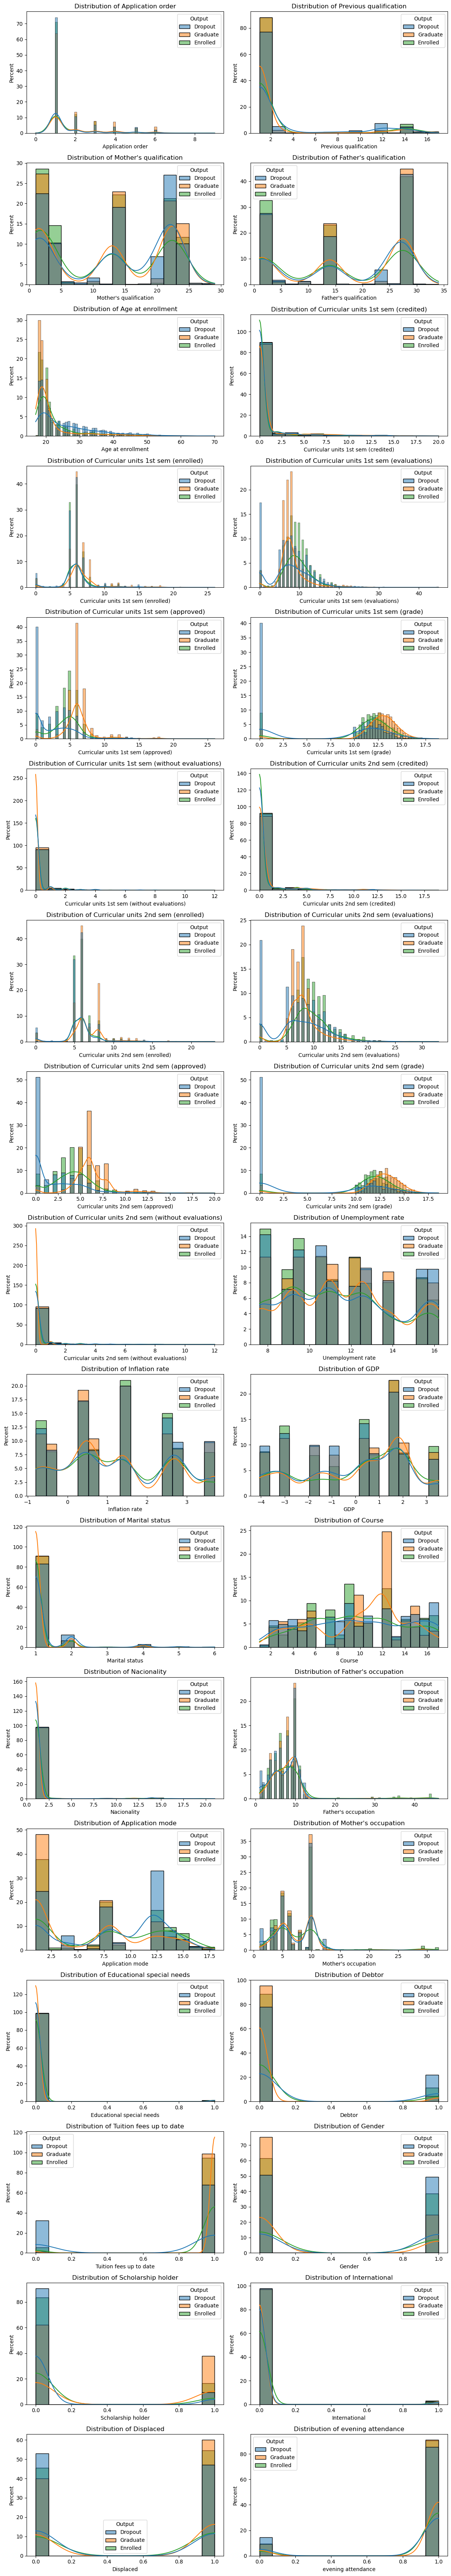

In [74]:
plot_distributions(data, variables, 'Output')

<!-- Additional variables appear to be categorical based on discrete distributions but difficult to know without understanding the data more. For example: Application order.

Also additional information on what the economic factors are would be helpful. For now I will drop them from any modelling. -->

In [57]:
# data.drop(columns=['GDP', 'Inflation rate', 'Unemployment rate'], inplace=True)
# variables.remove('GDP')
# variables.remove('Inflation rate')
# variables.remove('Unemployment rate')

# numeric_variables.remove('GDP')
# numeric_variables.remove('Inflation rate')
# numeric_variables.remove('Unemployment rate')

In [58]:
# # A particularly high concentration of nationality indicates that
# # this dataset is for a single university or a collection of national universities.
# data.Nacionality.value_counts() / data.shape[0]

In [59]:
# # I am particularly interested in the dropouts.
# dropouts = data.loc[data['Output'] == 'Dropout',:]


In [60]:
# plot_distributions(dropouts, variables, 'Output')

<!-- Interesting insights include:

Equally as likely to dropout if you are a male or female.
Dropouts tend to be older than the other populations.
International students equally as likely to drop out as the other populations. -->

In [61]:
# data.groupby(by=['Output', 'International']).size() / data.groupby('Output').size()

In [62]:
# # Will now create dummies for categorical variables
# data = pd.get_dummies(data, columns=categorical_variables, drop_first=True, dtype=int)

In [76]:
data.head(5)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [81]:
# Converting categorical variables of the dataset into numerical variables - using ONE HOT ENCODING technique
data['Output'] = data['Output'].apply({'Dropout': 0, 'Graduate': 1, 'Enrolled':2}.get)

In [83]:
data['Output']

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Output, Length: 4424, dtype: int64

<Axes: xlabel='Unemployment rate', ylabel='Nacionality'>

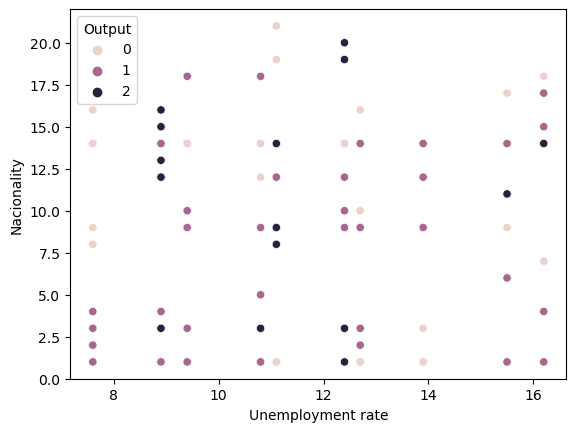

In [84]:
sns.scatterplot(x='Unemployment rate',y='Nacionality',data=data,hue='Output')

In [85]:
data.corr()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.074310
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563,-0.110086
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.027393
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518,-0.009877
evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.066439
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968,-0.068021
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563,0.009248
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664,-0.071100
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200,-0.033291
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880,0.077593


<Axes: >

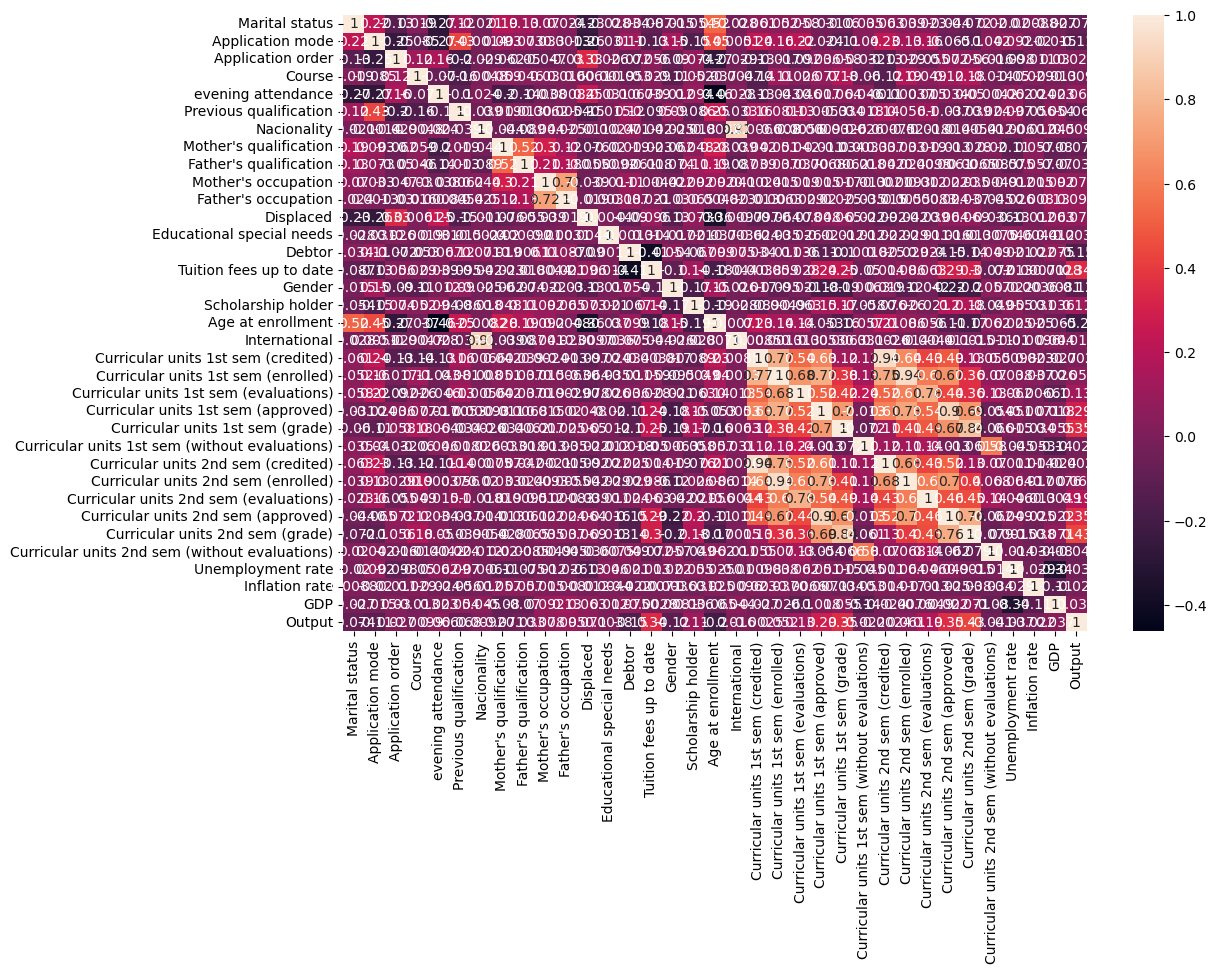

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

## Dividing the dataset into dependent and independent columns

In [87]:
X= data.drop('Output',axis=1)
y=data['Output']
X.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [88]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Output, dtype: int64

### Splitting the dataset into training and testing set
#### 20% of the dataset will be used for testing(evaluation) and 80% of the data will be used for training purposes

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [100]:
def baseline_classification_models(X_train, y_train, X_test, y_test, random_state=101):
    """
    Fits and scores baseline binary classification models, and plots a bar chart with F1 scores.
    """
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state),
        'knn': KNeighborsClassifier(),
        'svc': SVC(random_state=random_state, class_weight='balanced'),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(n_estimators=10, random_state=random_state),
        'XGB Classifier': xgb.XGBClassifier(random_state=random_state),
        'ada_boost_model': AdaBoostClassifier(n_estimators=15, random_state=random_state),
        'gradient_model': GradientBoostingClassifier(random_state=random_state),
        'CatBoost': CatBoostClassifier(logging_level='Silent', random_state=random_state)
    }

    num_models = len(models)
    colors = plt.cm.viridis(np.linspace(0, 1, num_models))

    # Fit and score each model
    
    # Fit and score each model
    f1_scores = {}
    for model_name, model in models.items():
        model.fit(scaled_X_train, y_train)
        if model_name == 'XGB Classifier':
            print(model.get_xgb_params())
        y_pred = model.predict(scaled_X_test)
    
        # Update this line to handle multiclass F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')  
        f1_scores[model_name] = f1
        print(f"{model_name} - F1 Score: {f1}")

    # Plot the bar chart
    plt.bar(f1_scores.keys(), f1_scores.values(), color=colors)
    plt.xlabel('Models')
    plt.ylabel('F1 Score')
    plt.title('Baseline Binary Classification Models Performance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()  # Added this line to display the plot

Logistic Regression - F1 Score: 0.757948911695712
knn - F1 Score: 0.6792160317222492
svc - F1 Score: 0.7528056469579241
Decision Tree - F1 Score: 0.7046891475813407
Random Forest - F1 Score: 0.7404640458354592
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 101, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
XGB Classifier - F1 Score: 0.766662833413263
ada_boost_mo

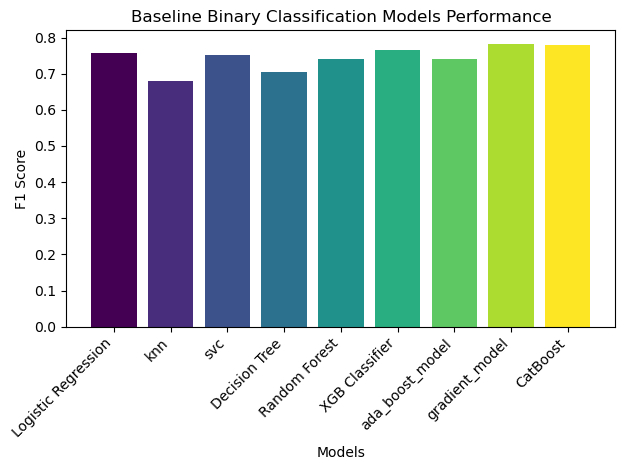

In [205]:
baseline_classification_models(scaled_X_train, y_train, scaled_X_test, y_test)

## Logistic Regression

In [102]:
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train, y_train)
log_pred = log_model.predict(scaled_X_test)
log_cm = confusion_matrix(y_test, log_pred)
log_ac = accuracy_score(y_test, log_pred)
rounded_log_ac = np.round(float(log_ac), 2)
print(f"Accuracy: {rounded_log_ac * 100}")
# print("Confusion Matrix {0}".format(log_conf))
print("Confusion Matrix: ")
print(log_cm)

Accuracy: 77.0
Confusion Matrix: 
[[251  57  37]
 [  9 548  25]
 [ 43  80  56]]


### Report back your search's optimal parameters, specifically the C value

In [103]:
log_model.C_

array([21.5443469, 21.5443469, 21.5443469])

In [104]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [105]:
log_model.coef_

array([[-4.99993459e-02,  2.57393336e-03,  8.42383870e-02,
         2.18038194e-01,  4.33339296e-02, -5.24080288e-02,
         3.31180822e-01,  1.66400571e-01, -7.48251292e-02,
        -1.67915080e-01, -6.01830638e-02,  1.22269407e-01,
        -1.70284233e-04,  1.36859421e-01, -5.72006012e-01,
         1.26727192e-01, -1.11303049e-01,  2.87086268e-01,
        -4.20226200e-01,  3.10764759e-01,  2.30141561e-01,
        -4.44964129e-02, -1.04073691e+00,  3.13251490e-01,
        -4.53858989e-02,  1.90481215e-01,  9.87837747e-01,
        -1.14103200e-01, -1.42803337e+00, -3.61292760e-01,
        -1.08749920e-01,  2.10757701e-01, -1.13645444e-02,
         6.21412767e-02],
       [ 6.64267948e-02, -8.53286518e-02, -1.34672854e-02,
        -2.09459876e-01,  1.47095481e-03,  1.27459015e-01,
        -2.35557830e-01, -2.73058632e-02,  9.01709271e-02,
         6.05239755e-02, -2.22744307e-03, -5.32938878e-02,
        -4.68377100e-03, -2.09887486e-01,  3.94466053e-01,
        -1.28342757e-01,  2.10

### Model Performance Evaluation

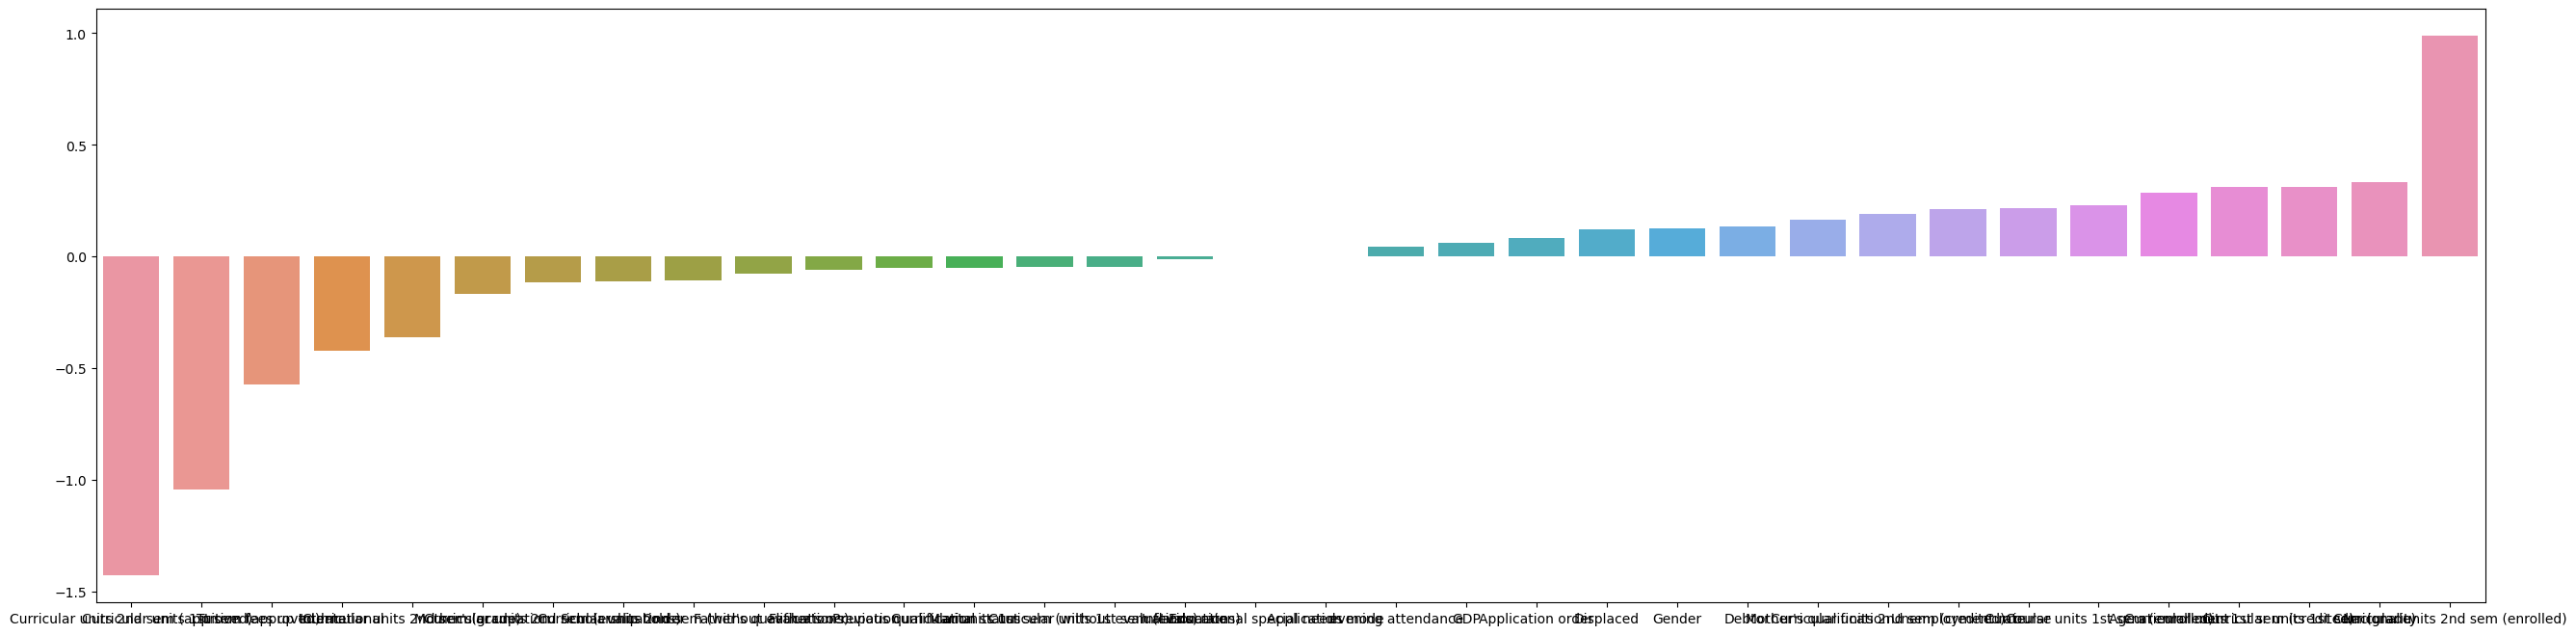

In [106]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(32,8))
sns.barplot(x=coefs.index,y=coefs.values);

In [107]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
y_pred = log_model.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[251  57  37]
 [  9 548  25]
 [ 43  80  56]]
0.7730560578661845


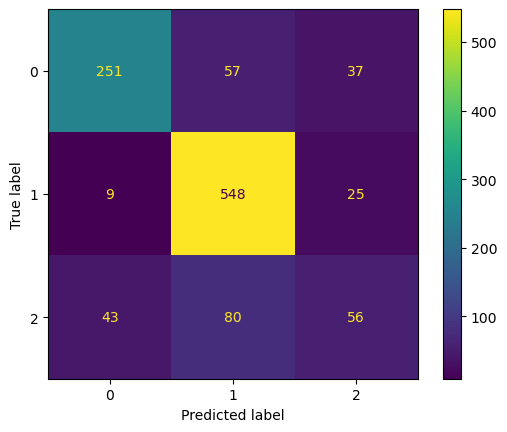

In [108]:
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       345
           1       0.80      0.94      0.87       582
           2       0.47      0.31      0.38       179

    accuracy                           0.77      1106
   macro avg       0.70      0.66      0.67      1106
weighted avg       0.76      0.77      0.76      1106



## KNN

In [113]:
knn = KNeighborsClassifier()
operations = [('scaler', scaler), ('knn', knn)]
pipe = Pipeline(operations)
k_values = list(range(1, 30))
knn_param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe, knn_param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(scaled_X_train, y_train)
full_cv_classifier.best_estimator_.get_params()
knn_pred = full_cv_classifier.predict(scaled_X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_ac = accuracy_score(y_test, knn_pred)
rounded_knn_ac = np.round(float(knn_ac), 2)
print(f"Accuracy: {rounded_knn_ac * 100}")
print("Confusion Matrix: ")
print(knn_cm)

Accuracy: 72.0
Confusion Matrix: 
[[212  94  39]
 [ 12 546  24]
 [ 31 107  41]]


### Model Performance Evaluation

Confusion Matrix:
[[212  94  39]
 [ 12 546  24]
 [ 31 107  41]]


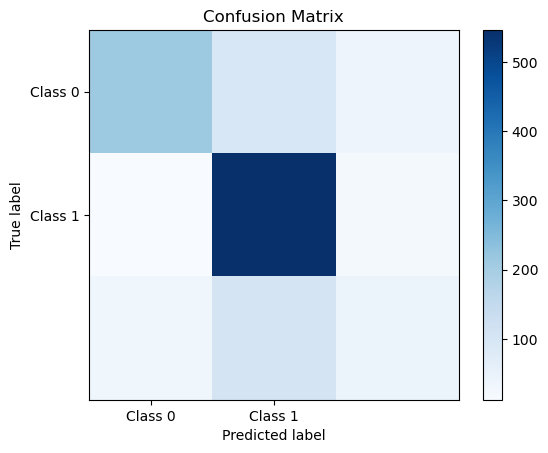

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.61      0.71       345
           1       0.73      0.94      0.82       582
           2       0.39      0.23      0.29       179

    accuracy                           0.72      1106
   macro avg       0.65      0.59      0.61      1106
weighted avg       0.71      0.72      0.70      1106



In [114]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have trained the classifier (full_cv_classifier) and scaled your test data (scaled_X_test)

# Make predictions
y_pred = full_cv_classifier.predict(scaled_X_test)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using matplotlib
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["Class 0", "Class 1"]  # Adjust class names if needed
tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Support Vector Machine

In [115]:
svc = SVC(class_weight='balanced')
svc_param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
svc_grid = GridSearchCV(svc, svc_param_grid)
svc_grid.fit(scaled_X_train, y_train)
svc_grid_pred = svc_grid.predict(scaled_X_test)
svc_cm = confusion_matrix(y_test, svc_grid_pred)
svc_ac = accuracy_score(y_test, svc_grid_pred)
rounded_svc_ac = np.round(float(svc_ac), 2)
print(f"Accuracy: {rounded_svc_ac * 100}")
print("Confusion Matrix: ")
print(svc_cm)

Accuracy: 74.0
Confusion Matrix: 
[[232  33  80]
 [  7 474 101]
 [ 24  46 109]]


## Decision Tree

In [116]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(scaled_X_train, y_train)
decision_tree_pred = decision_tree_model.predict(scaled_X_test)
dt_cm = confusion_matrix(y_test, decision_tree_pred)
dt_ac = accuracy_score(y_test, decision_tree_pred)
rounded_dt_ac = np.round(float(dt_ac), 2)
print(f"Accuracy: {rounded_dt_ac * 100}")
print("Confusion Matrix: ")
print(dt_cm)

Accuracy: 70.0
Confusion Matrix: 
[[233  54  58]
 [ 43 453  86]
 [ 47  46  86]]


## Random Forest Machine

In [118]:
# Use 10 random trees
Random_Forest_model = RandomForestClassifier(n_estimators=10, random_state=101)
Random_Forest_model.fit(scaled_X_train, y_train)
Random_Forest_preds = Random_Forest_model.predict(scaled_X_test)
rf_cm = confusion_matrix(y_test, Random_Forest_preds)
rf_ac = accuracy_score(y_test, Random_Forest_preds)
rounded_rf_ac = np.round(float(rf_ac), 2)
print(f"Accuracy: {rounded_rf_ac * 100}")
print("Confusion Matrix: ")
print(rf_cm)

Accuracy: 76.0
Confusion Matrix: 
[[262  59  24]
 [ 27 522  33]
 [ 51  76  52]]


### Boosting - Ada Boost

In [119]:
ada_boost_model = AdaBoostClassifier(n_estimators=15)
ada_boost_model.fit(scaled_X_train, y_train)
ada_boost_preds = ada_boost_model.predict(scaled_X_test)
adb_cm = confusion_matrix(y_test, ada_boost_preds)
adb_ac = accuracy_score(y_test, ada_boost_preds)
rounded_adb_ac = np.round(float(adb_ac), 2)
print(f"Accuracy: {rounded_adb_ac * 100}")
print("Confusion Matrix: ")
print(adb_cm)

Accuracy: 75.0
Confusion Matrix: 
[[251  49  45]
 [ 22 519  41]
 [ 45  75  59]]


### Boosting - Gradient Boost

In [121]:
gb_model = GradientBoostingClassifier()
gb_param_grid = {"n_estimators": [1, 5, 10, 20, 40, 100], 'max_depth': [3, 4, 5, 6]}
gb_grid = GridSearchCV(gb_model, gb_param_grid)
gb_grid.fit(scaled_X_train, y_train)
gb_predictions = gb_grid.predict(scaled_X_test)
gb_cm = confusion_matrix(y_test, gb_predictions)
gb_ac = accuracy_score(y_test, gb_predictions)
rounded_gb_ac = np.round(float(gb_ac), 2)
print(f"Accuracy: {rounded_gb_ac * 100}")
print("Confusion Matrix: ")
print(gb_cm)

Accuracy: 78.0
Confusion Matrix: 
[[249  52  44]
 [  9 538  35]
 [ 30  72  77]]


### XG BOOST

In [174]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Create XGBClassifier model
xgb_model = XGBClassifier()

# Define hyperparameter grid
xgb_param_grid = {'n_estimators': [1, 5, 10, 20, 40, 100],'max_depth': [3, 4, 5, 6],}

# Use GridSearchCV for hyperparameter tuning
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid)
xgb_grid.fit(scaled_X_train, y_train)

# Make predictions using the best model
xgb_predictions = xgb_grid.predict(scaled_X_test)

# Calculate accuracy and confusion matrix
xgb_ac = accuracy_score(y_test, xgb_predictions)
rounded_xgb_ac = np.round(float(xgb_ac), 2)
print(f"Accuracy: {rounded_xgb_ac * 100}")

xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("Confusion Matrix:")
print(xgb_cm)


Accuracy: 80.0
Confusion Matrix:
[[252  50  43]
 [  7 545  30]
 [ 32  60  87]]


### CAT Boost

In [129]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Create CatBoostClassifier model
catboost_model = CatBoostClassifier()

# Define hyperparameter grid
catboost_param_grid = {'n_estimators': [1, 5, 10, 20, 40, 100],'depth': [3, 4, 5, 6]}

# Use GridSearchCV for hyperparameter tuning
catboost_grid = GridSearchCV(catboost_model, catboost_param_grid)
catboost_grid.fit(scaled_X_train, y_train)

# Make predictions using the best model
catboost_predictions = catboost_grid.predict(scaled_X_test)

# Calculate accuracy and confusion matrix
catboost_ac = accuracy_score(y_test, catboost_predictions)
rounded_catboost_ac = np.round(float(catboost_ac), 2)
print(f"Accuracy: {rounded_catboost_ac * 100}")

catboost_cm = confusion_matrix(y_test, catboost_predictions)
print("Confusion Matrix:")
print(catboost_cm)


Learning rate set to 0.5
0:	learn: 0.8492983	total: 1.59ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8440394	total: 771us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8265455	total: 673us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8310217	total: 1.16ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8286272	total: 654us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8492983	total: 655us	remaining: 2.62ms
1:	learn: 0.7419803	total: 1.26ms	remaining: 1.89ms
2:	learn: 0.6911148	total: 1.9ms	remaining: 1.27ms
3:	learn: 0.6601431	total: 2.54ms	remaining: 634us
4:	learn: 0.6357926	total: 3.14ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8440394	total: 751us	remaining: 3.01ms
1:	learn: 0.7380845	total: 1.38ms	remaining: 2.07ms
2:	learn: 0.6944655	total: 2.03ms	remaining: 1.35ms
3:	learn: 0.6565220	total: 2.67ms	remaining: 668us
4:	learn: 0.6347809	total: 3.29ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8265455	total: 643us	remaining: 2.58m

### Prediction on New Data

In [132]:
data.head(2)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1


In [168]:
data["GDP"].value_counts()

GDP
 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: count, dtype: int64

In [169]:
data_new = {'Marital status': 6, 'Application mode': 17, 'Application order': 9, 'Course': 10, 'evening attendance': 1,
            'Previous qualification': 14, 'Nacionality': 12, "Mother's qualification": 19, "Father's qualification":27, "Mother's occupation":10,
            "Father's occupation":22, "Displaced":1, "Educational special needs":0, "Debtor":1, "Tuition fees up to date":1, "Gender":0, 
            "Scholarship holder":1, "Age at enrollment":21, "International":0, "Curricular units 1st sem (credited)": 15, 
            "Curricular units 1st sem (enrolled)" : 16, "Curricular units 1st sem (evaluations)":8, "Curricular units 1st sem (approved)": 14,
            "Curricular units 1st sem (grade)": 12.000000, "Curricular units 1st sem (without evaluations)":2, 
            "Curricular units 2nd sem (credited)":8, "Curricular units 2nd sem (enrolled)":4, 
            "Curricular units 2nd sem (evaluations)":24, "Curricular units 2nd sem (approved)":6, 
            "Curricular units 2nd sem (grade)":14.622222, "Curricular units 2nd sem (without evaluations)":7, "Unemployment rate":9.4, 
            "Inflation rate":2.6, "GDP": 0.32 }
index = [1]  # serial number
my_data = pd.DataFrame(data_new, index)

## Trying to predict with a new test dataset

In [199]:
new_insert_data=pd.read_csv("new_dataset.csv", delimiter=';' )
new_insert_data.head(2)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [203]:
new_insert_data = new_insert_data.drop('Output', axis =1)
new_insert_data

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
5,2,12,1,17,0,12,1,22,27,10,...,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92


In [204]:
#Predicting the Price  using the new_inserted_data
student_output=full_cv_classifier.predict(new_insert_data)
# output_data = np.round(student_output, 2)
print(f"{student_output}")
# for price in rounded_price:
#     integer_price=int(price)
#     # print(integer_price)
#Add the output of rounded_price to the existing new_insert_data sheet.

new_insert_data.insert(len(new_insert_data.columns), 'Output', student_output)
new_insert_data

[0 1 1 1 1 1]


,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1


In [181]:
def log_reg():
    data_output = log_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Logistic Regression: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using Logistic Regression: The student will be a Graduate ")
    else:
        print("Predicted using Logistic Regression: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_log_ac * 100}% ")

def knn_reg():
    data_output = full_cv_classifier.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using KNN: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using KNN: The student will be a Graduate ")
    else:
        print("Predicted using KNN: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_knn_ac * 100}% ")
    
def svc_reg():
    data_output = decision_tree_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Support Vector Machine: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using Support Vector Machine: The student will be a Graduate ")
    else:
        print("Predicted using Support Vector Machine: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_svc_ac * 100}% ")
    
def dt_reg():
    data_output = svc_grid.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Decision Tree: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using Decision Tree: The student will be a Graduate ")
    else:
        print("Predicted using Decision Tree: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_dt_ac * 100}% ")

def rf_reg():
    data_output = Random_Forest_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Random Forest: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using Random Forest: The student will be a Graduate ")
    else:
        print("Predicted using Random Forest: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_rf_ac * 100}% ")

def adb_boosting():
    data_output = ada_boost_model.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using Ada Boost: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using Ada Boos: The student will be a Graduate ")
    else:
        print("Predicted using Ada Boos: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_adb_ac * 100}% ")
    
def gb_boosting():
    data_output = gb_grid.predict(my_data.values)
   
    if data_output == 0:
        print("Predicted using Gradient Boost: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using Gradient Boos: The student will be a Graduate ")
    else:
        print("Predicted using Gradient Boos: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_gb_ac * 100}% ")
    
def xg_boost():
    data_output = xgb_grid.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using XG Boost: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using XG Boos: The student will be a Graduate ")
    else:
        print("Predicted using XG Boos: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_xgb_ac * 100}% ")
    
def cat_boost():
    data_output = catboost_grid.predict(my_data.values)
    
    if data_output == 0:
        print("Predicted using CAT Boost: The student will be a Dropout ")
    elif data_output ==1:
        print("Predicted using CAT Boos: The student will be a Graduate ")
    else:
        print("Predicted using CAT Boos: The student will be Enrolled ")

    print(f"Above data is calculated with an Accuracy {rounded_catboost_ac * 100}% ")


In [182]:
print(log_ac,knn_ac,svc_ac,dt_ac,rf_ac,adb_ac,gb_ac,xgb_ac,catboost_ac)

0.7730560578661845 0.7224231464737794 0.7368896925858951 0.6980108499095841 0.755877034358047 0.7495479204339964 0.7811934900542495 0.7992766726943942 0.7730560578661845


In [192]:
# Store accuracies and corresponding functions in a dictionary
model_accuracies = {
    'log_ac': log_ac,
    'knn_ac': knn_ac,
    'svc_ac': svc_ac,
    'dt_ac': dt_ac,
    'rf_ac': rf_ac,
    'adb_ac': adb_ac,
    'gb_ac': gb_ac,
    'xgb_ac': xgb_ac,
    'catboost':catboost_ac
}

# Find the maximum accuracy and call the corresponding function
max_accuracy_key = max(model_accuracies, key=model_accuracies.get)
max_accuracy_value = model_accuracies[max_accuracy_key]

# Call the corresponding function
if max_accuracy_key == 'log_ac':
    log_reg()
if max_accuracy_key == 'knn_ac':
    knn_reg()
elif max_accuracy_key == 'svc_ac':
    svc_reg()
elif max_accuracy_key == 'dt_ac':
    dt_reg()
elif max_accuracy_key == 'rf_ac':
    rf_reg()
elif max_accuracy_key == 'adb_ac':
    adb_boosting()
elif max_accuracy_key == 'xgb_ac':
    xg_boost()
elif max_accuracy_key == 'catboost_ac':
    cat_boost()
else:
    gb_boosting()

Predicted using XG Boos: The student will be a Graduate 
Above data is calculated with an Accuracy 80.0% 


In [193]:
# Find the maximum accuracy
max_accuracy_value = max(model_accuracies.values())

# Find all models with the maximum accuracy
best_models = [key for key, value in model_accuracies.items() if value == max_accuracy_value]

# Handle the case where there are multiple best models (e.g., by printing them)
if len(best_models) == 1:
    best_model = best_models[0]
    if best_model == 'log_ac':
        log_reg()
    elif best_model == 'knn_ac':
        knn_reg()
    elif best_model == 'svc_ac':
        svc_reg()
    elif best_model == 'dt_ac':
        dt_reg()
    elif best_model == 'rf_ac':
        rf_reg()
    elif best_model == 'adb_ac':
        adb_boosting()
    elif best_model == 'xgb_ac':
        xg_boost()
    elif best_model == 'catboost_ac':
        cat_boost()
    else:
        gb_boosting()
else:
    print(f"Multiple models ({', '.join(best_models)}) have the same maximum accuracy.")
    # Handle the case of multiple best models as needed

Predicted using XG Boos: The student will be a Graduate 
Above data is calculated with an Accuracy 80.0% 
